In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/Assignment1

/content/drive/MyDrive/Assignment1


In [3]:
#acquire data
train_path = 'Training_data'
valid_path = 'Testing_data'

In [10]:
import tensorflow as tf
#defining the model
model = tf.keras.models.Sequential([
    #First convolution
    tf.keras.layers.Conv2D(filters=2,kernel_size=3,activation='sigmoid',input_shape=(224,224,3)),#changed the image size
    tf.keras.layers.MaxPooling2D(pool_size=2,strides=1,padding='valid'),

    #Second convolution
    tf.keras.layers.Conv2D(filters=2,kernel_size=3,activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2,strides=1,padding='valid'),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(100,activation='relu'),#modified here increase the number of neurons from 50 to 100 to increase accuracy

    tf.keras.layers.Dense(5,activation='softmax'),
])

In [5]:
#getting the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 122, 122, 2)       56        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 121, 121, 2)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 119, 119, 2)       38        
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 118, 118, 2)      0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 27848)             0         
                                                                 
 dense (Dense)               (None, 100)               2

In [13]:
#compiling the model
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='categorical_crossentropy', 
             optimizer=RMSprop(lr=0.0001),
             metrics=['accuracy']) 

In [14]:
#train the model from the generators
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(rescale = 1./255)
train_generator = train_datagen.flow_from_directory(train_path, 
                                                   target_size=(224,224), #changing the image size
                                                    batch_size=16,
                                                    class_mode='categorical')
                                                   

#All test images will be rescaled 1./255
test_datagen = ImageDataGenerator(rescale = 1./255)

#apply predefined specification to test the dataset
test_set = test_datagen.flow_from_directory(valid_path,
                                            target_size=(224,224), #changing the image size
                                            batch_size = 16,
                                            class_mode = 'categorical')

Found 523 images belonging to 5 classes.
Found 128 images belonging to 5 classes.


In [15]:
#training
history = model.fit(train_generator,validation_data=test_set,steps_per_epoch=8,epochs=75)#increased the number of epochs from 50 to 75

Epoch 1/75
8/8 [==============================] - 8s 892ms/step - loss: 4.8454 - accuracy: 0.2266 - val_loss: 2.0012 - val_accuracy: 0.2109
Epoch 2/75
8/8 [==============================] - 7s 869ms/step - loss: 2.0317 - accuracy: 0.1797 - val_loss: 1.7813 - val_accuracy: 0.2344
Epoch 3/75
8/8 [==============================] - 7s 864ms/step - loss: 1.6958 - accuracy: 0.2812 - val_loss: 1.8021 - val_accuracy: 0.2656
Epoch 4/75
8/8 [==============================] - 8s 1s/step - loss: 1.7431 - accuracy: 0.2031 - val_loss: 1.6944 - val_accuracy: 0.2578
Epoch 5/75
8/8 [==============================] - 7s 873ms/step - loss: 1.8433 - accuracy: 0.2031 - val_loss: 1.7525 - val_accuracy: 0.2266
Epoch 6/75
8/8 [==============================] - 7s 876ms/step - loss: 1.6612 - accuracy: 0.2266 - val_loss: 1.7421 - val_accuracy: 0.2500
Epoch 7/75
8/8 [==============================] - 7s 878ms/step - loss: 1.7842 - accuracy: 0.2188 - val_loss: 1.8248 - val_accuracy: 0.2109
Epoch 8/75
8/8 [=======

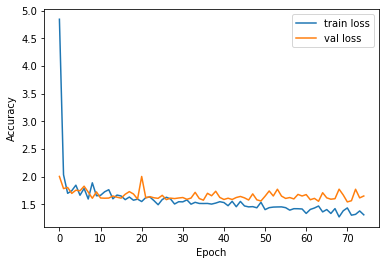

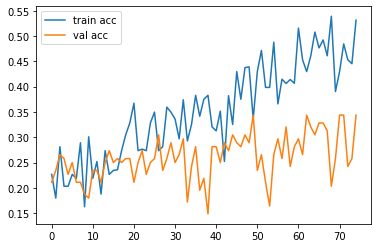

<Figure size 432x288 with 0 Axes>

In [16]:
#plot variation in loss and accuracy
import matplotlib.pyplot as plt

#plot the loss
plt.plot(history.history['loss'],label='train loss')
plt.plot(history.history['val_loss'],label='val loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
plt.savefig('q2_IT20076016_loss')

#plot the accuracy
plt.plot(history.history['accuracy'],label='train acc')
plt.plot(history.history['val_accuracy'],label='val acc')
plt.legend()
plt.show()
plt.savefig('q2_ IT20076016_accuracy')